In [ ]:
ls data

1. outcome_total.xlsx                   9. offline_total.xlsx
2. outcome_category_total.xlsx          Add_people_total.xlsx
3. market_total.xlsx                    Add_search_total.xlsx
4. search_total.xlsx                    Add_tchannel_total.xlsx
5. people_total.xlsx                    Add_time_total.xlsx
6. marry_total.xlsx                     coffee_temple-20230725T021529Z-001.zip
7. region_total.xlsx                    raw_data/
8. delivery_total.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join
import matplotlib.pyplot as plt
import datetime as dt
import re

In [ ]:
path = join(os.getcwd(), "data")

# ·Ñè·Ö•·Ñë·Öµ·Ñê·Ö¶·Ü∑·Ñë·Ö≥·ÜØ_·Ñâ·Ö°·Üº·Ñâ·Ö¶_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•(Ïò§ÌîÑÎùºÏù∏ Îç∞Ïù¥ÌÑ∞)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
offline_df = pd.read_excel('/content/drive/MyDrive/9. offline_total.xlsx')

## Í≤∞Ï∏°Ïπò

In [ ]:
offline_df.isna().sum().sum()

0

In [ ]:
pd.options.display.max_columns = None
offline_df.head(3)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ Ï£ºÎ¨∏ Ï±ÑÎÑê                 Í≤∞Ï†úÎÇ¥Ïó≠     Ìï©Í≥Ñ ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏ Í≤∞Ï†ú Ìï†Ïù∏  Ïπ¥Îìú Í≤∞Ï†ú  \
0  2022-02-07  19:28:53    ÏÖÄÎü¨              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      -      -     -      -   
1  2022-02-10  10:03:28    ÏÖÄÎü¨  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500      -     -  32500   
2  2022-02-10  10:03:28    ÏÖÄÎü¨  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500      -     -  32500   

  ÌòÑÍ∏à Í≤∞Ï†ú Í∞ÑÌé∏ Í≤∞Ï†ú Í∏∞ÌÉÄ Í≤∞Ï†ú Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥ ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å    ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú  \
0     -     -     -       -      -      -      -  4500  2022-02-07 19:29:37   
1     -     -     -       -      -      -      -     -                    -   
2     -     -     -       -      -      -      -     -                    -   

  Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)   Ïπ¥ÌÖåÍ≥†Î¶¨              ÏÉÅÌíàÎ™Ö ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ Í≤∞Ï†úÎ©îÎ™®  
0           -  ÏóêÏä§ÌîÑÎ†àÏÜå          ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº  -   1    4500      -    -  
1           -   Ìï∏ÎìúÎìúÎ¶Ω  (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†  -   1   10500  10500    -  
2           -   Ìï∏ÎìúÎìúÎ¶Ω   (H) ÎãàÏπ¥ÎùºÍ≥º COE#1  -   1   12000  12000    -

## data ÌÉÄÏûÖ
* Ìï©Í≥Ñ , Ïπ¥Îìú Í≤∞Ï†ú, ÌôòÎ∂à columnÏùÄ int Î°ú Î≥ÄÌôò ÌïÑÏöî (ÌòÑÏû¨ ÎπàÏπ∏Ïùò Í≤ΩÏö∞ "-" Í∏∞ÏûÖ Ï≤òÎ¶¨ object)
* Í≤∞Ï†úÏùº , Í≤∞Ï†úÏãúÍ∞Ñ , ÌôòÎ∂à ÏùºÏãú datatime or timestamp Î°ú Î≥ÄÌôò (Î≥ÄÌôò ÌïÑÏöîÏãú)

In [ ]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Í≤∞Ï†úÏùº          145010 non-null  object
 1   Í≤∞Ï†úÏãúÍ∞Ñ         145010 non-null  object
 2   Ï£ºÎ¨∏ Ï±ÑÎÑê        145010 non-null  object
 3   Í≤∞Ï†úÎÇ¥Ïó≠         145010 non-null  object
 4   Ìï©Í≥Ñ           145010 non-null  object
 5   ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏       145010 non-null  object
 6   Í≤∞Ï†ú Ìï†Ïù∏        145010 non-null  object
 7   Ïπ¥Îìú Í≤∞Ï†ú        145010 non-null  object
 8   ÌòÑÍ∏à Í≤∞Ï†ú        145010 non-null  object
 9   Í∞ÑÌé∏ Í≤∞Ï†ú        145010 non-null  object
 10  Í∏∞ÌÉÄ Í≤∞Ï†ú        145010 non-null  object
 11  Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥      145010 non-null  object
 12  ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏       145010 non-null  object
 13  Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏       145010 non-null  object
 14  ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å       145010 non-null  object
 15  ÌôòÎ∂à           145010 non-null  object
 16

In [ ]:
offline_df

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ Ï£ºÎ¨∏ Ï±ÑÎÑê                 Í≤∞Ï†úÎÇ¥Ïó≠     Ìï©Í≥Ñ ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏ Í≤∞Ï†ú Ìï†Ïù∏  \
0       2022-02-07  19:28:53    ÏÖÄÎü¨              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      -      -     -   
1       2022-02-10  10:03:28    ÏÖÄÎü¨  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500      -     -   
2       2022-02-10  10:03:28    ÏÖÄÎü¨  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500      -     -   
3       2022-02-10  10:03:28    ÏÖÄÎü¨  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500      -     -   
4       2022-02-10  10:13:57    ÏÖÄÎü¨      ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº Ïô∏ 2Í±¥  20000      -     -   
...            ...       ...   ...                  ...    ...    ...   ...   
145005  2023-05-31  17:21:24    ÏÖÄÎü¨          ÎìúÎ¶ΩÎ∞± Ï•¨Ïãú Ïô∏ 2Í±¥  36100      -     -   
145006  2023-05-31  17:21:24    ÏÖÄÎü¨          ÎìúÎ¶ΩÎ∞± Ï•¨Ïãú Ïô∏ 2Í±¥  36100      -     -   
145007  2023-05-31  17:22:16    ÏÖÄÎü¨          (KCW) Í∏∞ÎÖê Î±ÉÏßÄ   6000      -     -   
145008  2023-05-31  17:24:37    ÏÖÄÎü¨     (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú Ïô∏ 1Í±¥  14000      -     -   
145009  2023-05-31  17:24:37    ÏÖÄÎü¨     (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú Ïô∏ 1Í±¥  14000      -     -   

        Ïπ¥Îìú Í≤∞Ï†ú ÌòÑÍ∏à Í≤∞Ï†ú Í∞ÑÌé∏ Í≤∞Ï†ú Í∏∞ÌÉÄ Í≤∞Ï†ú Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥ ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏ Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏ ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å    ÌôòÎ∂à  \
0           -     -     -     -       -      -      -      -  4500   
1       32500     -     -     -       -      -      -      -     -   
2       32500     -     -     -       -      -      -      -     -   
3       32500     -     -     -       -      -      -      -     -   
4       20000     -     -     -       -      -      -      -     -   
...       ...   ...   ...   ...     ...    ...    ...    ...   ...   
145005  36100     -     -     -       -      -      -      -     -   
145006  36100     -     -     -       -      -      -      -     -   
145007   6000     -     -     -       -      -      -      -     -   
145008  14000     -     -     -       -      -      -      -     -   
145009  14000     -     -     -       -      -      -      -     -   

                      ÌôòÎ∂à ÏùºÏãú Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)    Ïπ¥ÌÖåÍ≥†Î¶¨              ÏÉÅÌíàÎ™Ö ÏòµÏÖò  ÏàòÎüâ  \
0       2022-02-07 19:29:37           -   ÏóêÏä§ÌîÑÎ†àÏÜå          ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº  -   1   
1                         -           -    Ìï∏ÎìúÎìúÎ¶Ω  (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†  -   1   
2                         -           -    Ìï∏ÎìúÎìúÎ¶Ω   (H) ÎãàÏπ¥ÎùºÍ≥º COE#1  -   1   
3                         -           -    Ìï∏ÎìúÎìúÎ¶Ω   (H) Í≥ºÌÖå Î†àÎìú ÌååÏπ¥ÎßàÎùº  -   1   
4                         -           -    ÏãúÍ∑∏ÎãàÏ≤ò       ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº  -   1   
...                     ...         ...     ...              ... ..  ..   
145005                    -           -  ÎìúÎ¶ΩÎ∞±/Ï∫°Ïäê          ÎìúÎ¶ΩÎ∞± ÌÅ¥ÎûòÏãù  -   1   
145006                    -           -      Ìè¨Ïû•              Ï¢ÖÏù¥Î∞±  -   1   
145007                    -           -      MD      (KCW) Í∏∞ÎÖê Î±ÉÏßÄ  -   1   
145008                    -           -    ÎπÑÎ≤ÑÎ¶¨ÏßÄ      (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú  -   1   
145009                    -           -    ÎπÑÎ≤ÑÎ¶¨ÏßÄ        (H) Ïò§ÎØ∏Ïûê Ï∞®  -   1   

        ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ Í≤∞Ï†úÎ©îÎ™®  
0         4500      -    -  
1        10500  10500    -  
2        12000  12000    -  
3        10000  10000    -  
4         7000   7000    -  
...        ...    ...  ...  
145005   18000  18000    -  
145006     100    100    -  
145007    6000   6000    -  
145008    7000   7000    -  
145009    7000   7000    -  

[145010 rows x 25 columns]

In [ ]:
def convert_to_nan(data):
    df = data.copy()
    columns = df.columns.to_list()
    for col in columns:
        df[col] = df[col].apply(lambda x: np.nan if x == "-" else x)

    return df

offline_df = convert_to_nan(offline_df)

In [ ]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Í≤∞Ï†úÏùº          145010 non-null  object 
 1   Í≤∞Ï†úÏãúÍ∞Ñ         145010 non-null  object 
 2   Ï£ºÎ¨∏ Ï±ÑÎÑê        145010 non-null  object 
 3   Í≤∞Ï†úÎÇ¥Ïó≠         145010 non-null  object 
 4   Ìï©Í≥Ñ           143016 non-null  float64
 5   ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏       2 non-null       float64
 6   Í≤∞Ï†ú Ìï†Ïù∏        369 non-null     float64
 7   Ïπ¥Îìú Í≤∞Ï†ú        140020 non-null  float64
 8   ÌòÑÍ∏à Í≤∞Ï†ú        2858 non-null    float64
 9   Í∞ÑÌé∏ Í≤∞Ï†ú        104 non-null     float64
 10  Í∏∞ÌÉÄ Í≤∞Ï†ú        82 non-null      float64
 11  Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥      0 non-null       float64
 12  ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏       0 non-null       float64
 13  Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏       0 non-null       float64
 14  ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å       0 non-null       float64
 15  ÌôòÎ∂à           1991 non-n

In [ ]:
offline_df

## .describe
* count Í∞Ä 0Ïù∏ column Îì§Ïùò Í≤ΩÏö∞ Ï†úÍ±∞
* Ï£ºÎ¨∏ Ï±ÑÎÑê Ïª¨ÎüºÏùÄ Í∞íÏù¥ Î™®Îëê "ÏÖÄÎü¨"Ïù¥ÎØÄÎ°ú Ï†úÍ±∞

In [ ]:
offline_df.head(1)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ Ï£ºÎ¨∏ Ï±ÑÎÑê     Í≤∞Ï†úÎÇ¥Ïó≠  Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏  Ïπ¥Îìú Í≤∞Ï†ú  ÌòÑÍ∏à Í≤∞Ï†ú  \
0  2022-02-07  19:28:53    ÏÖÄÎü¨  ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº NaN     NaN    NaN    NaN    NaN   

   Í∞ÑÌé∏ Í≤∞Ï†ú  Í∏∞ÌÉÄ Í≤∞Ï†ú  Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥  ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏  Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏  ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú  \
0    NaN    NaN      NaN     NaN     NaN     NaN  4500.0  2022-02-07 19:29:37   

   Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)   Ïπ¥ÌÖåÍ≥†Î¶¨      ÏÉÅÌíàÎ™Ö   ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä  ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ  Í≤∞Ï†úÎ©îÎ™®  
0          NaN  ÏóêÏä§ÌîÑÎ†àÏÜå  ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº  NaN   1    4500     NaN   NaN

In [ ]:
num_columns = offline_df.select_dtypes(exclude = "object").columns.to_list()
offline_df[num_columns].describe()

# "Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥", "ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏", "Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏", "ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å", "Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)", "Í≤∞Ï†úÎ©îÎ™®"

Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏          Í≤∞Ï†ú Ìï†Ïù∏          Ïπ¥Îìú Í≤∞Ï†ú          ÌòÑÍ∏à Í≤∞Ï†ú  \
count  143016.000000     2.0     369.000000  140020.000000    2858.000000   
mean    22427.917170  3600.0   26802.357724   22321.277817   23578.660602   
std     16015.168545     0.0   24233.387948   15430.987537   18961.881445   
min         2.000000  3600.0    1000.000000     100.000000       2.000000   
25%     13500.000000  3600.0    7200.000000   13500.000000   13000.000000   
50%     19000.000000  3600.0   19200.000000   19000.000000   20000.000000   
75%     27000.000000  3600.0   40200.000000   26725.000000   30100.000000   
max    420000.000000  3600.0  126000.000000  418000.000000  205000.000000   

               Í∞ÑÌé∏ Í≤∞Ï†ú         Í∏∞ÌÉÄ Í≤∞Ï†ú  Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥  ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏  Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏  ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å  \
count     104.000000     82.000000      0.0     0.0     0.0     0.0   
mean    28449.038462  22950.000000      NaN     NaN     NaN     NaN   
std     24816.014228  12611.157611      NaN     NaN     NaN     NaN   
min      3500.000000   3300.000000      NaN     NaN     NaN     NaN   
25%     13500.000000  13500.000000      NaN     NaN     NaN     NaN   
50%     19000.000000  20500.000000      NaN     NaN     NaN     NaN   
75%     34875.000000  33000.000000      NaN     NaN     NaN     NaN   
max    102400.000000  51200.000000      NaN     NaN     NaN     NaN   

                  ÌôòÎ∂à  Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)             ÏàòÎüâ         ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä  \
count    1991.000000          0.0  145010.000000  145010.000000   
mean    27780.411853          NaN       1.114006    7594.773471   
std     20888.164378          NaN       0.424342    4779.003910   
min       100.000000          NaN       1.000000       0.000000   
25%     15000.000000          NaN       1.000000    6000.000000   
50%     21500.000000          NaN       1.000000    7000.000000   
75%     32500.000000          NaN       1.000000    7000.000000   
max    222600.000000          NaN      25.000000  104600.000000   

              ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ  Í≤∞Ï†úÎ©îÎ™®  
count  143016.000000   0.0  
mean     8433.577376   NaN  
std      6342.009938   NaN  
min         0.000000   NaN  
25%      6500.000000   NaN  
50%      7000.000000   NaN  
75%      8000.000000   NaN  
max    300000.000000   NaN

In [ ]:
cat_columns = offline_df.select_dtypes(include = "object").columns.to_list()
offline_df[cat_columns].describe()

# "Ï£ºÎ¨∏ Ï±ÑÎÑê"

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ   Ï£ºÎ¨∏ Ï±ÑÎÑê             Í≤∞Ï†úÎÇ¥Ïó≠                ÌôòÎ∂à ÏùºÏãú  \
count       145010    145010  145010           145010                 1994   
unique         459     26782       1             3736                  794   
top     2023-05-21  12:11:06      ÏÖÄÎü¨  ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº Ïô∏ 1Í±¥  2023-05-21 12:53:13   
freq           574        29  145010            10086                    9   

          Ïπ¥ÌÖåÍ≥†Î¶¨         ÏÉÅÌíàÎ™Ö   ÏòµÏÖò  
count   145010      145010   36  
unique      18        1230    9  
top       ÏãúÍ∑∏ÎãàÏ≤ò  ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº  Hot  
freq     40431       16040   18

In [ ]:
rm_columns = ["Ïò®ÎùºÏù∏ Ïä§ÌÜ†Ïñ¥", "ÏÇ¨Ïö© Ìè¨Ïù∏Ìä∏", "Ï†ÅÎ¶Ω Ìè¨Ïù∏Ìä∏", "ÏÇ¨Ïö© ÏÑ†Î∂àÍ∂å", "Î∞∞Îã¨ÌåÅ(Îß§Ï∂ú Ìè¨Ìï®x)", "Í≤∞Ï†úÎ©îÎ™®", "Ï£ºÎ¨∏ Ï±ÑÎÑê"]
offline_df = offline_df.drop(rm_columns, axis = 1)

In [ ]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Í≤∞Ï†úÏùº     145010 non-null  object 
 1   Í≤∞Ï†úÏãúÍ∞Ñ    145010 non-null  object 
 2   Í≤∞Ï†úÎÇ¥Ïó≠    145010 non-null  object 
 3   Ìï©Í≥Ñ      143016 non-null  float64
 4   ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  2 non-null       float64
 5   Í≤∞Ï†ú Ìï†Ïù∏   369 non-null     float64
 6   Ïπ¥Îìú Í≤∞Ï†ú   140020 non-null  float64
 7   ÌòÑÍ∏à Í≤∞Ï†ú   2858 non-null    float64
 8   Í∞ÑÌé∏ Í≤∞Ï†ú   104 non-null     float64
 9   Í∏∞ÌÉÄ Í≤∞Ï†ú   82 non-null      float64
 10  ÌôòÎ∂à      1991 non-null    float64
 11  ÌôòÎ∂à ÏùºÏãú   1994 non-null    object 
 12  Ïπ¥ÌÖåÍ≥†Î¶¨    145010 non-null  object 
 13  ÏÉÅÌíàÎ™Ö     145010 non-null  object 
 14  ÏòµÏÖò      36 non-null      object 
 15  ÏàòÎüâ      145010 non-null  int64  
 16  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä  145010 non-null  int64  
 17  ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ  143016 non-null  float64

## date, datetime, timestamp

In [ ]:
offline_df.head(5)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ                 Í≤∞Ï†úÎÇ¥Ïó≠       Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏    Ïπ¥Îìú Í≤∞Ï†ú  \
0  2022-02-07  19:28:53              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      NaN     NaN    NaN      NaN   
1  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   
2  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   
3  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   
4  2022-02-10  10:13:57      ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº Ïô∏ 2Í±¥  20000.0     NaN    NaN  20000.0   

   ÌòÑÍ∏à Í≤∞Ï†ú  Í∞ÑÌé∏ Í≤∞Ï†ú  Í∏∞ÌÉÄ Í≤∞Ï†ú      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú   Ïπ¥ÌÖåÍ≥†Î¶¨              ÏÉÅÌíàÎ™Ö  \
0    NaN    NaN    NaN  4500.0  2022-02-07 19:29:37  ÏóêÏä§ÌîÑÎ†àÏÜå          ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº   
1    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω  (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†   
2    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω   (H) ÎãàÏπ¥ÎùºÍ≥º COE#1   
3    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω   (H) Í≥ºÌÖå Î†àÎìú ÌååÏπ¥ÎßàÎùº   
4    NaN    NaN    NaN     NaN                  NaN   ÏãúÍ∑∏ÎãàÏ≤ò       ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº   

    ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä   ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ  
0  NaN   1    4500      NaN  
1  NaN   1   10500  10500.0  
2  NaN   1   12000  12000.0  
3  NaN   1   10000  10000.0  
4  NaN   1    7000   7000.0

In [ ]:
offline_df["Í≤∞Ï†úÏùºÏãú"] = offline_df.loc[:, "Í≤∞Ï†úÏùº"] + " " + offline_df.loc[:, "Í≤∞Ï†úÏãúÍ∞Ñ"]

In [ ]:
offline_df["Í≤∞Ï†úÏùºÏãú"] = pd.to_datetime(offline_df["Í≤∞Ï†úÏùºÏãú"])
offline_df

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ                 Í≤∞Ï†úÎÇ¥Ïó≠       Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏  \
0       2022-02-07  19:28:53              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      NaN     NaN    NaN   
1       2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN   
2       2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN   
3       2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN   
4       2022-02-10  10:13:57      ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº Ïô∏ 2Í±¥  20000.0     NaN    NaN   
...            ...       ...                  ...      ...     ...    ...   
145005  2023-05-31  17:21:24          ÎìúÎ¶ΩÎ∞± Ï•¨Ïãú Ïô∏ 2Í±¥  36100.0     NaN    NaN   
145006  2023-05-31  17:21:24          ÎìúÎ¶ΩÎ∞± Ï•¨Ïãú Ïô∏ 2Í±¥  36100.0     NaN    NaN   
145007  2023-05-31  17:22:16          (KCW) Í∏∞ÎÖê Î±ÉÏßÄ   6000.0     NaN    NaN   
145008  2023-05-31  17:24:37     (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú Ïô∏ 1Í±¥  14000.0     NaN    NaN   
145009  2023-05-31  17:24:37     (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú Ïô∏ 1Í±¥  14000.0     NaN    NaN   

          Ïπ¥Îìú Í≤∞Ï†ú  ÌòÑÍ∏à Í≤∞Ï†ú  Í∞ÑÌé∏ Í≤∞Ï†ú  Í∏∞ÌÉÄ Í≤∞Ï†ú      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú    Ïπ¥ÌÖåÍ≥†Î¶¨  \
0           NaN    NaN    NaN    NaN  4500.0  2022-02-07 19:29:37   ÏóêÏä§ÌîÑÎ†àÏÜå   
1       32500.0    NaN    NaN    NaN     NaN                  NaN    Ìï∏ÎìúÎìúÎ¶Ω   
2       32500.0    NaN    NaN    NaN     NaN                  NaN    Ìï∏ÎìúÎìúÎ¶Ω   
3       32500.0    NaN    NaN    NaN     NaN                  NaN    Ìï∏ÎìúÎìúÎ¶Ω   
4       20000.0    NaN    NaN    NaN     NaN                  NaN    ÏãúÍ∑∏ÎãàÏ≤ò   
...         ...    ...    ...    ...     ...                  ...     ...   
145005  36100.0    NaN    NaN    NaN     NaN                  NaN  ÎìúÎ¶ΩÎ∞±/Ï∫°Ïäê   
145006  36100.0    NaN    NaN    NaN     NaN                  NaN      Ìè¨Ïû•   
145007   6000.0    NaN    NaN    NaN     NaN                  NaN      MD   
145008  14000.0    NaN    NaN    NaN     NaN                  NaN    ÎπÑÎ≤ÑÎ¶¨ÏßÄ   
145009  14000.0    NaN    NaN    NaN     NaN                  NaN    ÎπÑÎ≤ÑÎ¶¨ÏßÄ   

                    ÏÉÅÌíàÎ™Ö   ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä   ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ                Í≤∞Ï†úÏùºÏãú  
0               ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº  NaN   1    4500      NaN 2022-02-07 19:28:53  
1       (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†  NaN   1   10500  10500.0 2022-02-10 10:03:28  
2        (H) ÎãàÏπ¥ÎùºÍ≥º COE#1  NaN   1   12000  12000.0 2022-02-10 10:03:28  
3        (H) Í≥ºÌÖå Î†àÎìú ÌååÏπ¥ÎßàÎùº  NaN   1   10000  10000.0 2022-02-10 10:03:28  
4            ÏïÑÏù¥Ïä§ ÌÖêÏ†ÄÎ¶∞ ÎùºÎñº  NaN   1    7000   7000.0 2022-02-10 10:13:57  
...                 ...  ...  ..     ...      ...                 ...  
145005          ÎìúÎ¶ΩÎ∞± ÌÅ¥ÎûòÏãù  NaN   1   18000  18000.0 2023-05-31 17:21:24  
145006              Ï¢ÖÏù¥Î∞±  NaN   1     100    100.0 2023-05-31 17:21:24  
145007      (KCW) Í∏∞ÎÖê Î±ÉÏßÄ  NaN   1    6000   6000.0 2023-05-31 17:22:16  
145008      (I) Ïò§ÎØ∏Ïûê ÏóêÏù¥Îìú  NaN   1    7000   7000.0 2023-05-31 17:24:37  
145009        (H) Ïò§ÎØ∏Ïûê Ï∞®  NaN   1    7000   7000.0 2023-05-31 17:24:37  

[145010 rows x 19 columns]

In [ ]:
offline_df["year"] = offline_df["Í≤∞Ï†úÏùºÏãú"].apply(lambda x: x.year)
offline_df["month"] = offline_df["Í≤∞Ï†úÏùºÏãú"].apply(lambda x: x.month)
offline_df["day"] = offline_df["Í≤∞Ï†úÏùºÏãú"].apply(lambda x: x.day)
offline_df["hour"] = offline_df["Í≤∞Ï†úÏùºÏãú"].apply(lambda x: x.hour)
offline_df["day_name"] = offline_df["Í≤∞Ï†úÏùºÏãú"].apply(lambda x: x.day_name())
offline_df["year_month"] = pd.to_datetime(offline_df["Í≤∞Ï†úÏùº"]).dt.strftime("%Y-%m")
# offline_df

# Ïò§ÌîÑÎùºÏù∏ - Ïò®ÎùºÏù∏ ÏõêÎëê
# Ïò§ÌîÑÎùºÏù∏(Ïú†ÌäúÎ∏å, Ïù¥Î≤§Ìä∏, Í≤åÏä§Ìä∏ Î∞îÎ¶¨Ïä§ÌÉÄ) ÏõêÎëê ÌåêÎß§ Ï¶ùÍ∞êÏù¥ ÏûàÎäîÏßÄ, Ïò®ÎùºÏù∏ÏóêÎèÑ Ï¶ùÍ∞êÏù¥ ÏûàÎäîÏßÄ
# purchase limitation (Í∏àÏï°Ï†ÅÏù∏ Î∂ÄÎ∂Ñ)

In [ ]:
# Í≥µÌú¥Ïùº ÌëúÏãúÌïòÍ∏∞
!pip install pytimekr

  Preparing metadata (setup.py) ... done
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7925 sha256=240e1c15980c78ca40ebf0abb8526d487392214e6d87bbffd23df7646315ebdf
  Stored in directory: /root/.cache/pip/wheels/b3/a3/ba/e73aaae1dec550b8667510c379b019295bba855275258745de
Successfully built pytimekr


In [ ]:
from pytimekr import pytimekr

In [ ]:
kr_holidays = pytimekr.holidays(year=2022)
kr_holidays

[datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 9, 9),
 datetime.date(2022, 9, 10),
 datetime.date(2022, 9, 11),
 datetime.date(2022, 1, 1),
 datetime.date(2022, 3, 1),
 datetime.date(2022, 5, 5),
 datetime.date(2022, 5, 8),
 datetime.date(2022, 6, 6),
 datetime.date(2022, 8, 15),
 datetime.date(2022, 10, 9),
 datetime.date(2022, 10, 3),
 datetime.date(2022, 12, 25)]

In [ ]:
offline_df.head(1)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ     Í≤∞Ï†úÎÇ¥Ïó≠  Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏  Ïπ¥Îìú Í≤∞Ï†ú  ÌòÑÍ∏à Í≤∞Ï†ú  Í∞ÑÌé∏ Í≤∞Ï†ú  \
0  2022-02-07  19:28:53  ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº NaN     NaN    NaN    NaN    NaN    NaN   

   Í∏∞ÌÉÄ Í≤∞Ï†ú      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú   Ïπ¥ÌÖåÍ≥†Î¶¨      ÏÉÅÌíàÎ™Ö   ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä  \
0    NaN  4500.0  2022-02-07 19:29:37  ÏóêÏä§ÌîÑÎ†àÏÜå  ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº  NaN   1    4500   

   ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ                Í≤∞Ï†úÏùºÏãú  year  month  day  hour day_name year_month  ÌèâÏùº  \
0     NaN 2022-02-07 19:28:53  2022      2    7    19   Monday    2022-02 NaN   

   Ï£ºÎßê  
0 NaN

In [ ]:
offline_df['day_name'].value_counts()

Sunday       25914
Saturday     24027
Monday       22524
Wednesday    20004
Friday       19983
Thursday     19392
Tuesday      13166
Name: day_name, dtype: int64

In [ ]:
offline_df['day_name'].value_counts().sort_index(ascending=True)

Friday       19983
Monday       22524
Saturday     24027
Sunday       25914
Thursday     19392
Tuesday      13166
Wednesday    20004
Name: day_name, dtype: int64

In [ ]:
# ÌèâÏùº, Ï£ºÎßê Íµ¨Î∂Ñ
# 0 = ÌèâÏùº, 1 = Ï£ºÎßê

conditionlist = [
    (offline_df['day_name'] == 'Monday') | (offline_df['day_name'] == 'Tuesday') | (offline_df['day_name'] =='Wednesday') |
    (offline_df['day_name'] == 'Thursday') | (offline_df['day_name'] == 'Friday'),
    (offline_df['day_name'] == 'Saturday')| (offline_df['day_name'] == 'Sunday')]

choicelist = [0, 1]
offline_df['is_weekends'] = np.select(conditionlist, choicelist, default='Not Specified')

offline_df.head(3)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ                 Í≤∞Ï†úÎÇ¥Ïó≠       Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏    Ïπ¥Îìú Í≤∞Ï†ú  \
0  2022-02-07  19:28:53              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      NaN     NaN    NaN      NaN   
1  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   
2  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   

   ÌòÑÍ∏à Í≤∞Ï†ú  Í∞ÑÌé∏ Í≤∞Ï†ú  Í∏∞ÌÉÄ Í≤∞Ï†ú      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú   Ïπ¥ÌÖåÍ≥†Î¶¨              ÏÉÅÌíàÎ™Ö  \
0    NaN    NaN    NaN  4500.0  2022-02-07 19:29:37  ÏóêÏä§ÌîÑÎ†àÏÜå          ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº   
1    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω  (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†   
2    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω   (H) ÎãàÏπ¥ÎùºÍ≥º COE#1   

    ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä   ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ                Í≤∞Ï†úÏùºÏãú  year  month  day  hour  \
0  NaN   1    4500      NaN 2022-02-07 19:28:53  2022      2    7    19   
1  NaN   1   10500  10500.0 2022-02-10 10:03:28  2022      2   10    10   
2  NaN   1   12000  12000.0 2022-02-10 10:03:28  2022      2   10    10   

   day_name year_month is_weekends  
0    Monday    2022-02           0  
1  Thursday    2022-02           0  
2  Thursday    2022-02           0

In [ ]:
# ÌèâÏùº, Ï£ºÎßê ÌïúÍ∏ÄÎ™ÖÏúºÎ°ú Ïª¨Îüº Ï∂îÍ∞Ä

conditionlist = [
    (offline_df['day_name'] == 'Monday') | (offline_df['day_name'] == 'Tuesday') | (offline_df['day_name'] =='Wednesday') |
    (offline_df['day_name'] == 'Thursday') | (offline_df['day_name'] == 'Friday'),
    (offline_df['day_name'] == 'Saturday')| (offline_df['day_name'] == 'Sunday')]

choicelist = ['ÌèâÏùº', 'Ï£ºÎßê']
offline_df['ÌèâÏùº_Ï£ºÎßê'] = np.select(conditionlist, choicelist, default='Not Specified')

offline_df.head(3)

In [ ]:
# ÏöîÏùº ÌïúÍ∏ÄÎ™ÖÏúºÎ°ú Ïª¨Îüº Ï∂îÍ∞Ä

conditionlist = [
    (offline_df['day_name'] == 'Monday'),
    (offline_df['day_name'] == 'Tuesday'),
    (offline_df['day_name'] =='Wednesday'),
    (offline_df['day_name'] == 'Thursday'),
    (offline_df['day_name'] == 'Friday'),
    (offline_df['day_name'] == 'Saturday'),
     (offline_df['day_name'] == 'Sunday')]

choicelist = ['ÏõîÏöîÏùº', 'ÌôîÏöîÏùº', 'ÏàòÏöîÏùº', 'Î™©ÏöîÏùº', 'Í∏àÏöîÏùº', 'ÌÜ†ÏöîÏùº', 'ÏùºÏöîÏùº']
offline_df['ÏöîÏùº'] = np.select(conditionlist, choicelist, default='Not Specified')

offline_df.head(3)

Í≤∞Ï†úÏùº      Í≤∞Ï†úÏãúÍ∞Ñ                 Í≤∞Ï†úÎÇ¥Ïó≠       Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏  Í≤∞Ï†ú Ìï†Ïù∏    Ïπ¥Îìú Í≤∞Ï†ú  \
0  2022-02-07  19:28:53              ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº      NaN     NaN    NaN      NaN   
1  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   
2  2022-02-10  10:03:28  (H) ÎãàÏπ¥ÎùºÍ≥º COE#1 Ïô∏ 2Í±¥  32500.0     NaN    NaN  32500.0   

   ÌòÑÍ∏à Í≤∞Ï†ú  Í∞ÑÌé∏ Í≤∞Ï†ú  Í∏∞ÌÉÄ Í≤∞Ï†ú      ÌôòÎ∂à                ÌôòÎ∂à ÏùºÏãú   Ïπ¥ÌÖåÍ≥†Î¶¨              ÏÉÅÌíàÎ™Ö  \
0    NaN    NaN    NaN  4500.0  2022-02-07 19:29:37  ÏóêÏä§ÌîÑÎ†àÏÜå          ÏÉòÌîå Ï∫êÎ™®ÎßàÏùº   
1    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω  (I) ÏΩúÎ°¨ÎπÑÏïÑ Î°úÍº¨ ÏÜåÎ•¥Î≤†   
2    NaN    NaN    NaN     NaN                  NaN   Ìï∏ÎìúÎìúÎ¶Ω   (H) ÎãàÏπ¥ÎùºÍ≥º COE#1   

    ÏòµÏÖò  ÏàòÎüâ  ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä   ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ                Í≤∞Ï†úÏùºÏãú  year  month  day  hour  \
0  NaN   1    4500      NaN 2022-02-07 19:28:53  2022      2    7    19   
1  NaN   1   10500  10500.0 2022-02-10 10:03:28  2022      2   10    10   
2  NaN   1   12000  12000.0 2022-02-10 10:03:28  2022      2   10    10   

   day_name year_month is_weekends season   ÏöîÏùº  
0    Monday    2022-02           0      3  ÏõîÏöîÏùº  
1  Thursday    2022-02           0      3  Î™©ÏöîÏùº  
2  Thursday    2022-02           0      3  Î™©ÏöîÏùº

In [ ]:
# Í≥ÑÏ†à Ï∂îÍ∞ÄÌïòÍ∏∞
# Î¥Ñ(3~5Ïõî) = 0, Ïó¨Î¶Ñ(6~8Ïõî) = 1, Í∞ÄÏùÑ(9~11Ïõî0) = 2, Í≤®Ïö∏(12~2Ïõî) = 3

conditionlist = [
    (offline_df['month'] == 3) | (offline_df['month'] == 4) | (offline_df['month'] == 5),
    (offline_df['month'] == 6) | (offline_df['month'] == 7) | (offline_df['month'] == 8),
    (offline_df['month'] == 9) | (offline_df['month'] == 10) | (offline_df['month'] == 11),
    (offline_df['month'] == 1) | (offline_df['month'] == 2) | (offline_df['month'] == 12)]

choicelist = [0, 1, 2, 3]
offline_df['season'] = np.select(conditionlist, choicelist, default='Not Specified')

offline_df.head(3)

In [ ]:
replace(offine_df['Í≤∞Ïû¨Ïùº']==202202-10)

In [ ]:
offline_df[offline_df['Í≤∞Ï†úÏùº']==2022-02-10]

In [ ]:
offline_df[offline_df['ÏÉÅÌíàÎ™Ö']=='ÏïºÏô∏']

In [ ]:
# Ïª§Ìîº ÌÖúÌîå Ïã§ÎÇ¥ ÏïºÏô∏ Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ

plt.plot(locate_df['year_month'], locate_df[locate_df['Î®πÏùÄ ÏúÑÏπò'], label="Îß§Ï∂ú",c = 'r', alpha = 0.5, marker = 'o')
plt.plot(locate_df['year_month'], locate_df[locate_df['Î®πÏùÄ ÏúÑÏπò']=='Ïã§ÎÇ¥', label="Í¥ÄÍ¥ëÍ∞ù Ïàò", c = 'b', alpha = 0.5, marker = 'o')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Í≤∞Ï†úÏùº          145010 non-null  object        
 1   Í≤∞Ï†úÏãúÍ∞Ñ         145010 non-null  object        
 2   Í≤∞Ï†úÎÇ¥Ïó≠         145010 non-null  object        
 3   Ìï©Í≥Ñ           143016 non-null  float64       
 4   ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏       2 non-null       float64       
 5   Í≤∞Ï†ú Ìï†Ïù∏        369 non-null     float64       
 6   Ïπ¥Îìú Í≤∞Ï†ú        140020 non-null  float64       
 7   ÌòÑÍ∏à Í≤∞Ï†ú        2858 non-null    float64       
 8   Í∞ÑÌé∏ Í≤∞Ï†ú        104 non-null     float64       
 9   Í∏∞ÌÉÄ Í≤∞Ï†ú        82 non-null      float64       
 10  ÌôòÎ∂à           1991 non-null    float64       
 11  ÌôòÎ∂à ÏùºÏãú        1994 non-null    object        
 12  Ïπ¥ÌÖåÍ≥†Î¶¨         145010 non-null  object        
 13  ÏÉÅÌíàÎ™Ö          145010 non-null  ob

## ÌèâÏùº Ï£ºÎßê Îß§Ï∂ú ÏãúÍ∞ÅÌôî(Ïõî)

In [ ]:
!pip install koreanize-matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 15.5 MB/s eta 0:00:00


In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Î™®Îìà Ïã§Ìñâ
import koreanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
offline_df.groupby('is_weekends')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum()

is_weekends
0    796521502.0
1    409615000.0
Name: ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ, dtype: float64

In [ ]:
offline_df.groupby('is_weekends')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum()/offline_df['is_weekends'].value_counts()

is_weekends
0    8378.351534
1    8201.978334
dtype: float64

In [ ]:
offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum()

day_name
Friday       173257900.0
Monday       184083502.0
Saturday     198775500.0
Sunday       210839500.0
Thursday     162518500.0
Tuesday      109341900.0
Wednesday    167319700.0
Name: ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ, dtype: float64

In [ ]:
offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].mean().value_counts()

8791.693307    1
8295.786480    1
8388.921713    1
8252.358214    1
8499.032528    1
8423.875193    1
8462.029029    1
Name: ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ, dtype: int64

In [ ]:
offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].mean().ascending=False

In [ ]:
day_mean = offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].mean().sort_values(ascending=False)

In [ ]:
day_mean_k = offline_df.groupby('ÏöîÏùº')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].mean().sort_values(ascending=False)
day_mean_k

ÏöîÏùº
Í∏àÏöîÏùº    8791.693307
Î™©ÏöîÏùº    8499.032528
ÏàòÏöîÏùº    8462.029029
ÌôîÏöîÏùº    8423.875193
ÌÜ†ÏöîÏùº    8388.921713
ÏõîÏöîÏùº    8295.786480
ÏùºÏöîÏùº    8252.358214
Name: ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ, dtype: float64

In [ ]:
day_mean

day_name
Friday       8791.693307
Thursday     8499.032528
Wednesday    8462.029029
Tuesday      8423.875193
Saturday     8388.921713
Monday       8295.786480
Sunday       8252.358214
Name: ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ, dtype: float64

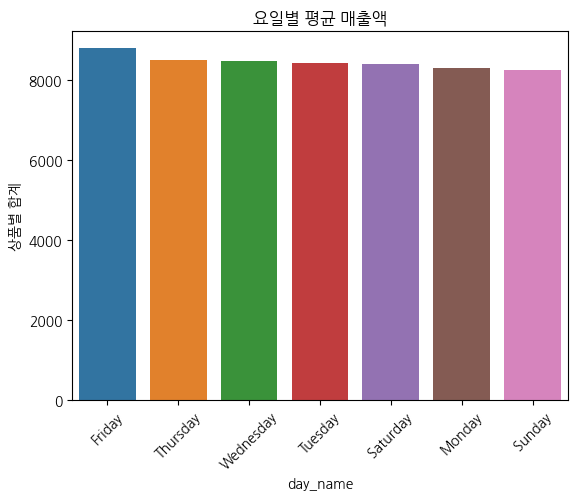

In [ ]:
sns.barplot(data=offline_df, x=day_mean.index, y=day_mean)
plt.xticks(rotation=45)
plt.title('ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Îß§Ï∂úÏï°')
plt.show()

In [ ]:
import seaborn as snsm

In [ ]:
sns.countplot(x=offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum().index, data=offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum())

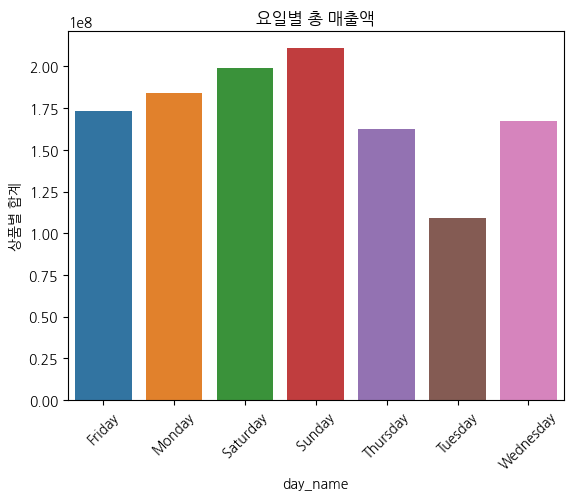

In [ ]:
# ÏöîÏùºÎ≥Ñ Îß§Ï∂úÏï° ÎßâÎåÄÍ∑∏ÎûòÌîÑ

sns.barplot(data=offline_df, x=offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum().index, y=offline_df.groupby('day_name')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum())
plt.xticks(rotation=45)
plt.title('ÏöîÏùºÎ≥Ñ Ï¥ù Îß§Ï∂úÏï°')
plt.show()

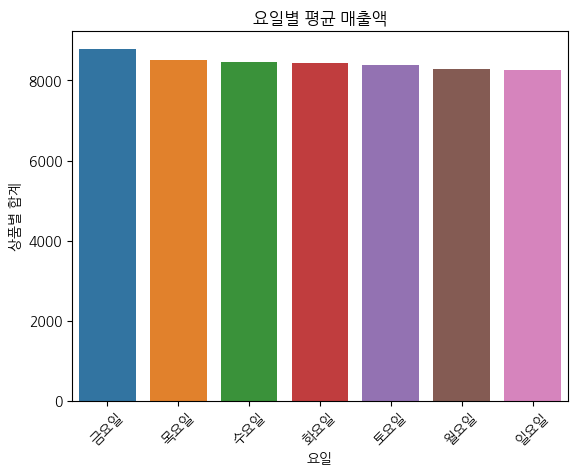

In [ ]:
sns.barplot(data=offline_df, x=day_mean_k.index, y=day_mean_k)
plt.xticks(rotation=45)
plt.title('ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Îß§Ï∂úÏï°')
plt.show()

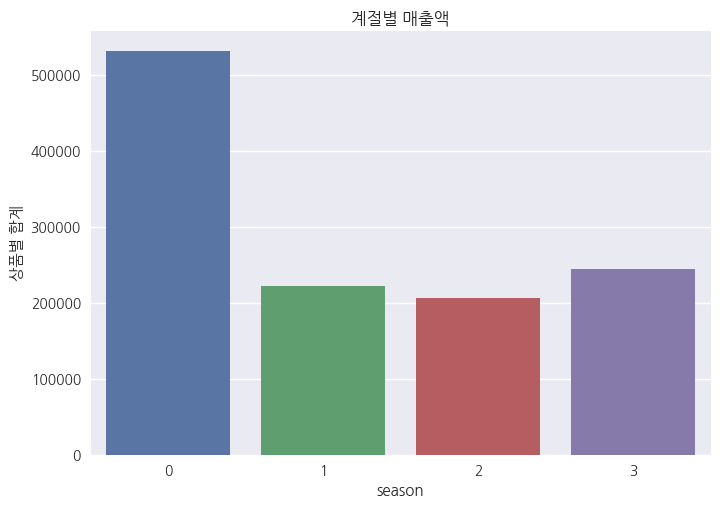

In [ ]:
# Í≤åÏ†àÎ≥Ñ Îß§Ï∂úÏï° ÎßâÎåÄÍ∑∏ÎûòÌîÑ
# Î¥Ñ(3~5Ïõî) = 0, Ïó¨Î¶Ñ(6~8Ïõî) = 1, Í∞ÄÏùÑ(9~11Ïõî) = 2, Í≤®Ïö∏(12~2Ïõî) = 3

sns.barplot(data=offline_df, x=offline_df.groupby('season')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum().index, y=offline_df.groupby('season')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum()/1000)
plt.title('Í≥ÑÏ†àÎ≥Ñ Îß§Ï∂úÏï°')
plt.show()

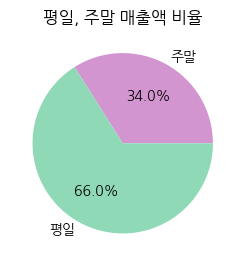

In [ ]:
# ÌèâÏùº, Ï£ºÎßê Îß§Ï∂ïÏï°  ÎπÑÏú® ÌååÏù¥Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
# ÌèâÏùº = 0, Ï£ºÎßê = 0

plt.subplot(1, 2, 1)
colors = ['#d395d0', '#8fd9b6']
plt.pie(offline_df.groupby('ÌèâÏùº_Ï£ºÎßê')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum(), labels=offline_df.groupby('ÌèâÏùº_Ï£ºÎßê')['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'].sum().index, autopct='%.1f%%', colors = colors)
plt.title('ÌèâÏùº, Ï£ºÎßê Îß§Ï∂úÏï° ÎπÑÏú®')
plt.show()

In [ ]:
plt.plot(train_ot.index, train_ot['ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'], label="Îß§Ï∂ú",c = 'r', alpha = 0.5, marker = 'o')
plt.plot(train_ot.index, train_ot['Î∞©Î¨∏Ïûê Ïàò'], label="Í¥ÄÍ¥ëÍ∞ù Ïàò", c = 'b', alpha = 0.5, marker = 'o')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
kr_holidays = pytimekr.holidays(year=2023)
kr_holidays

[datetime.date(2023, 1, 21),
 datetime.date(2023, 1, 22),
 datetime.date(2023, 1, 23),
 datetime.date(2023, 9, 28),
 datetime.date(2023, 9, 29),
 datetime.date(2023, 9, 30),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 3, 1),
 datetime.date(2023, 5, 5),
 datetime.date(2023, 5, 26),
 datetime.date(2023, 6, 6),
 datetime.date(2023, 8, 15),
 datetime.date(2023, 10, 9),
 datetime.date(2023, 10, 3),
 datetime.date(2023, 12, 25)]

In [ ]:
# Ïª§Ìîº_ÌÖúÌîå Í∏∞Ï§Ä

# 2022ÎÖÑ Í≥µÌú¥Ïùº

# ÏÇºÏùºÏ†à datetime.date(2022, 3, 1),
# Ïñ¥Î¶∞Ïù¥ÎÇ† datetime.date(2022, 5, 5),
# ÏÑùÍ∞ÄÌÉÑÏã†Ïùº datetime.date(2022, 5, 8),
# ÌòÑÏ∂©Ïùº datetime.date(2022, 6, 6),
# Í¥ëÎ≥µÏ†à datetime.date(2022, 8, 15),
# Ï∂îÏÑù datetime.date(2022, 9, 9),
# Ï∂îÏÑù datetime.date(2022, 9, 10),
# Ï∂îÏÑù datetime.date(2022, 9, 11),
# ÌïúÍ∏ÄÎÇ† datetime.date(2022, 10, 9),
# Í∞úÏ≤úÏ†à datetime.date(2022, 10, 3),
# ÌÅ¨Î¶¨Ïä§ÎßàÏä§  datetime.date(2022, 12, 25)]

# 2023ÎÖÑ Í≥µÌú¥Ïùº
# [datetime.date(2023, 1, 21),
#  datetime.date(2023, 1, 22),
#  datetime.date(2023, 1, 23),
#   datetime.date(2023, 1, 1),
#  datetime.date(2023, 3, 1),
#  datetime.date(2023, 5, 5),
#  datetime.date(2023, 5, 26),

# Ï†ÑÏ≤òÎ¶¨ Î∞è Ïã§Ìóò Îã®Í≥Ñ

In [ ]:
def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    import platform
    Linux = platform.system()
    # colab ÏÇ¨Ïö©ÏûêÎäî system_nameÏù¥ 'Linux'Î°ú ÌôïÏù∏

    if Linux == "Darwin" :
        font_family = "AppleGothic"
    elif Linux == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colabÏóêÏÑúÎäî runtimeÏùÑ <Íº≠> Ïû¨ÏãúÏûë Ìï¥ÏïºÌï©ÎãàÎã§.
        # Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûë ÌïòÏßÄ ÏïäÍ≥† Ìè∞Ìä∏ ÏÑ§ÏπòÎ•º ÌïòÎ©¥ Í∏∞Î≥∏ ÏÑ§Ï†ï Ìè∞Ìä∏Í∞Ä Î°úÎìúÎêòÏñ¥ ÌïúÍ∏ÄÏù¥ Íπ®ÏßëÎãàÎã§.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
plt.style.use("seaborn")
font_family = get_font_family()
# ÎßàÏù¥ÎÑàÏä§Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("axes", unicode_minus = False)
plt.rc("font", family = font_family)


plt.figure(figsize = (30,10))
sns.scatterplot(data= offline_df, x = "Í≤∞Ï†úÏùºÏãú", y = "ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä")

<ipython-input-16-6b6adc10c1ae>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


AttributeError: ignored

In [ ]:
import matplotlib.font_manager as fm

plt.style.use("seaborn")
font_family = get_font_family()
# ÎßàÏù¥ÎÑàÏä§Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("axes", unicode_minus = False)
plt.rc("font", family = font_family)


plt.figure(figsize = (30,10))
sns.scatterplot(data= offline_df, x = "Í≤∞Ï†úÏùºÏãú", y = "ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä")

In [ ]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    Linux = platform.system()

    if Linux == "Darwin":
        font_family = "AppleGothic"
    elif Linux == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Î¶¨ÎàÖÏä§ (ColabÏùò Í≤ΩÏö∞)
        # ColabÏóêÏÑúÎäî Ìè∞Ìä∏ ÏÑ§Ïπò ÌõÑ Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌï¥Ïïº Í∏∞Î≥∏ ÏÑ§Ï†ï Ìè∞Ìä∏Í∞Ä Î°úÎìúÎêòÏñ¥ ÌïúÍ∏ÄÏù¥ Íπ®ÏßÄÏßÄ ÏïäÏäµÎãàÎã§.
        !apt-get update -qq
        !apt-get install -qq fonts-nanum

        # ÏÉàÎ°úÏö¥ Ìè∞Ìä∏ Ï∫êÏãúÎ•º Î°úÎìúÌï©ÎãàÎã§.
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font_family = fm.FontProperties(fname=fontpath).get_name()

    return font_family



In [ ]:
# Chat GPT

import platform
import matplotlib.pyplot as plt
import seaborn as sns

def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Î¶¨ÎàÖÏä§ (ColabÏùò Í≤ΩÏö∞)
        # ColabÏóêÏÑúÎäî Ìè∞Ìä∏ ÏÑ§Ïπò ÌõÑ Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌï¥Ïïº Í∏∞Î≥∏ ÏÑ§Ï†ï Ìè∞Ìä∏Í∞Ä Î°úÎìúÎêòÏñ¥ ÌïúÍ∏ÄÏù¥ Íπ®ÏßÄÏßÄ ÏïäÏäµÎãàÎã§.
        !apt-get update -qq
        !apt-get install -qq fonts-nanum > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        font_family = font.get_name()

        # Ìè∞Ìä∏ Ï∫êÏãúÎ•º Ïû¨Íµ¨Ï∂ïÌï©ÎãàÎã§.
        plt.rcParams['font.family'] = font_family
        plt.rcParams['axes.unicode_minus'] = False

        # Îü∞ÌÉÄÏûÑÏùÑ Ïû¨ÏãúÏûëÌï©ÎãàÎã§.
        #import os
        #os.kill(os.getpid(), 9)

    return font_family

<ipython-input-20-9e2fa85c3f71>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Axes: xlabel='Í≤∞Ï†úÏùºÏãú', ylabel='ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  func(*ar

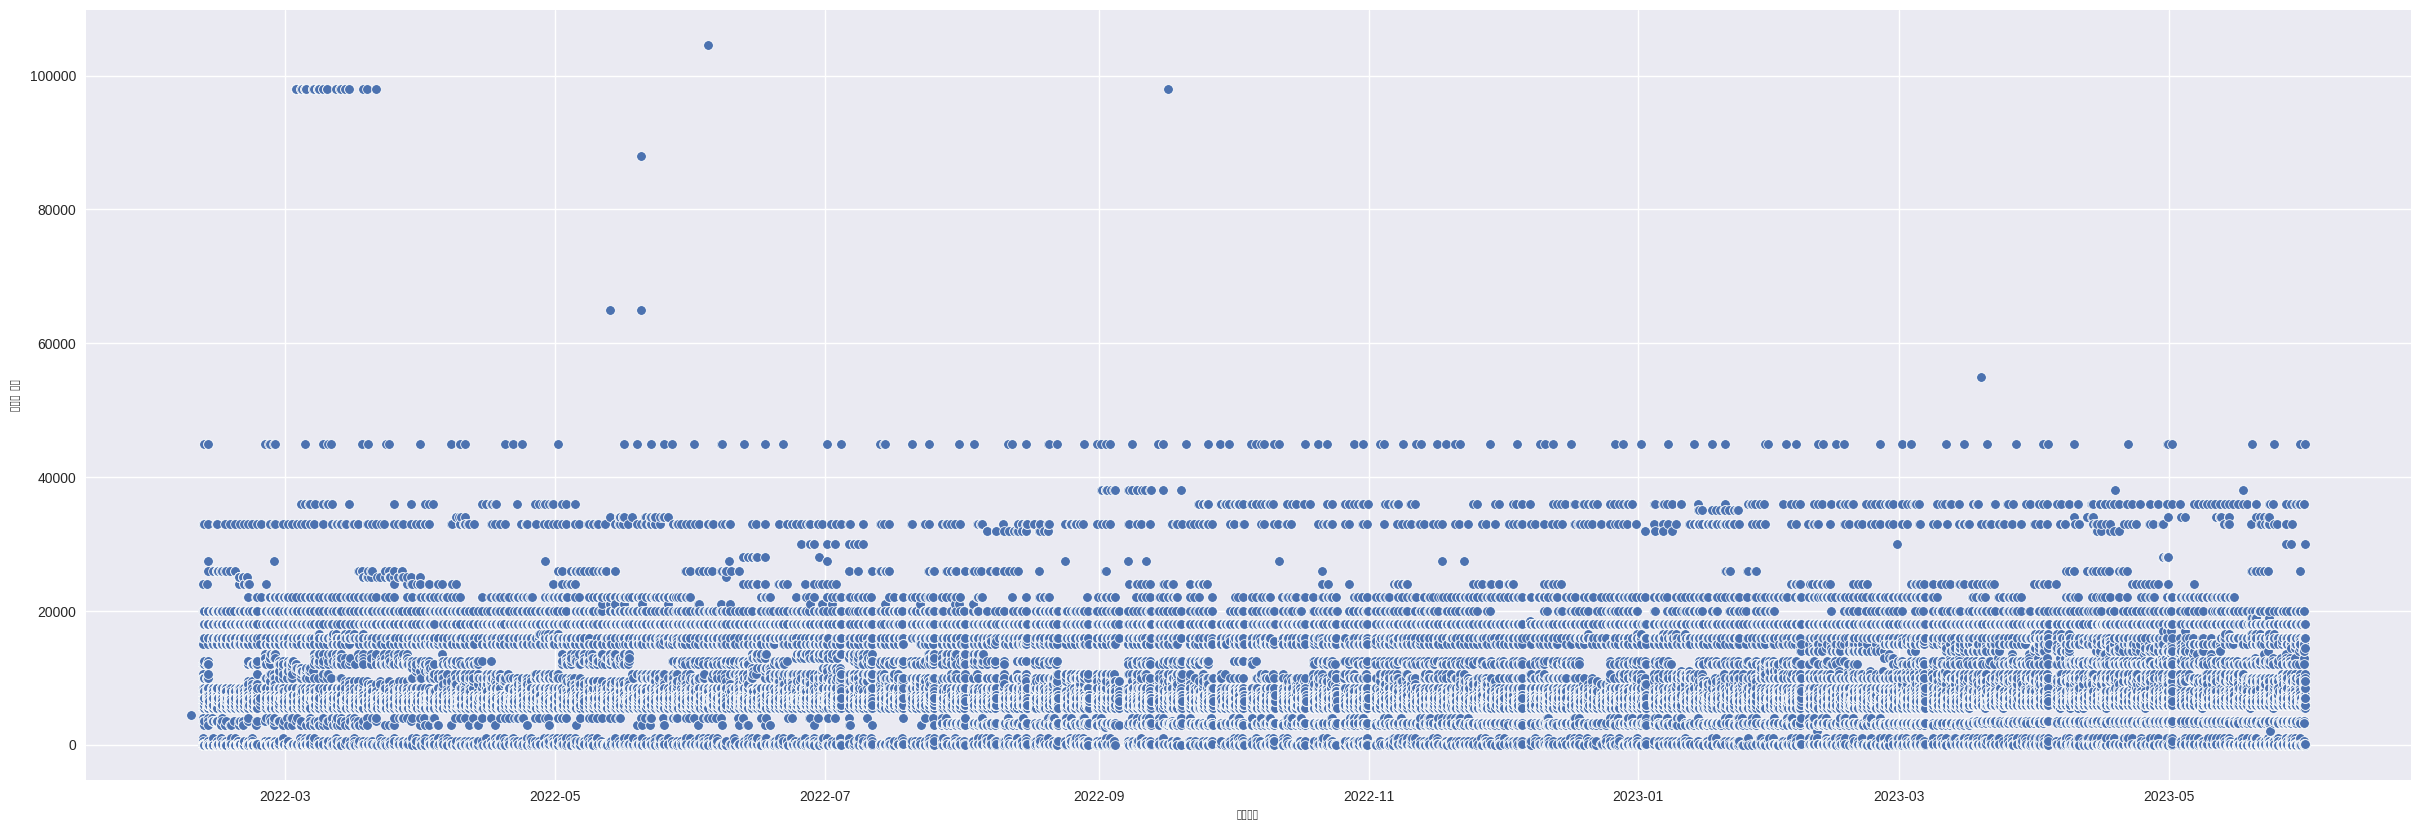

In [ ]:
plt.style.use("seaborn")
# ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ ÏÑ§Ï†ï


plt.figure(figsize=(30, 10))
sns.scatterplot(data=offline_df, x="Í≤∞Ï†úÏùºÏãú", y="ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä")

<ipython-input-32-cb56ee375670>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Axes: xlabel='Í≤∞Ï†úÏùºÏãú', ylabel='ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  func(*ar

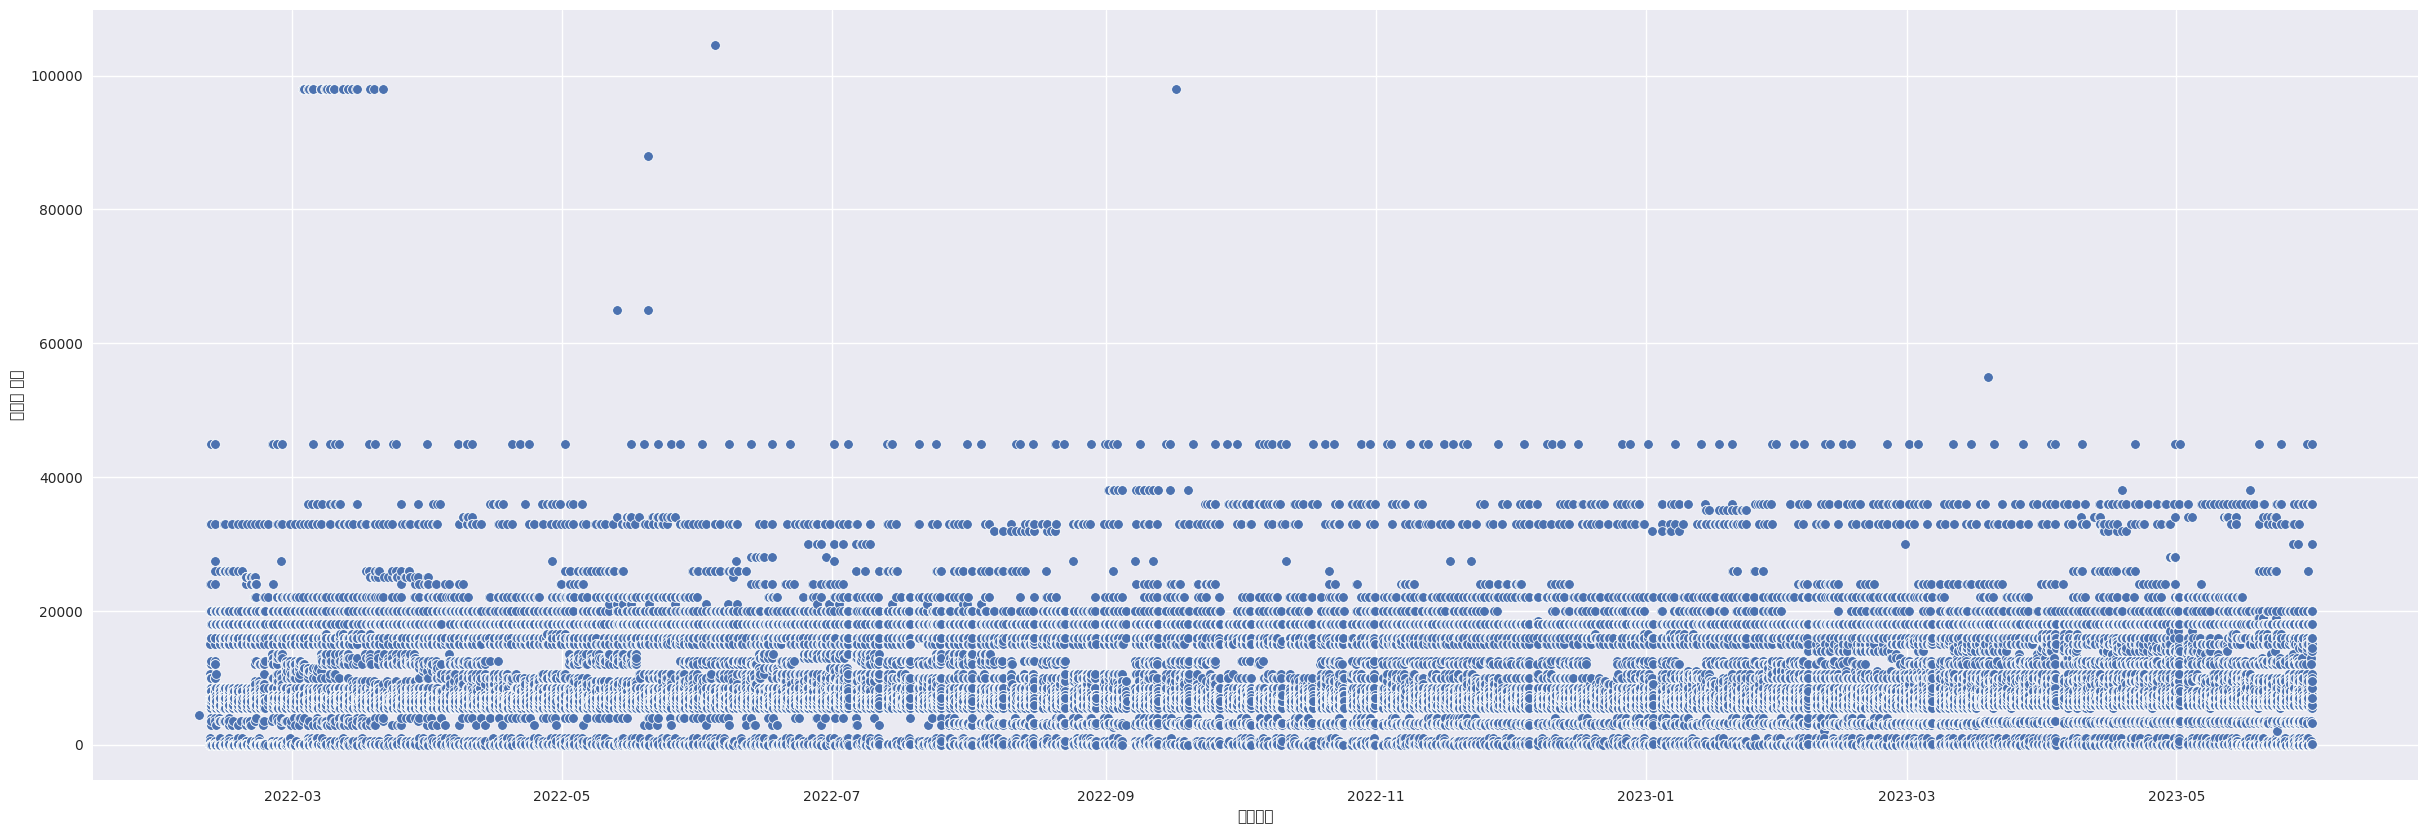

In [ ]:
plt.style.use("seaborn")
font_family = get_font_family()

plt.rc("axes", unicode_minus=False)
plt.rc("font", family=font_family)

plt.figure(figsize=(30, 10))
sns.scatterplot(data=offline_df, x="Í≤∞Ï†úÏùºÏãú", y="ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä")

In [ ]:
g = offline_df.groupby("Í≤∞Ï†úÏùº")["ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ"].sum().reset_index()
plt.figure(figsize = (50,5))
plt.xticks(rotation = 90)
sns.lineplot(data = g, x = "Í≤∞Ï†úÏùº", y = "ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ")

In [ ]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
plt.figure(figsize = (20,5))
sns.lineplot(data = g, x = "year_month"
, y = "ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ")

<AxesSubplot:xlabel='year_month', ylabel='ÏàòÎüâ'>

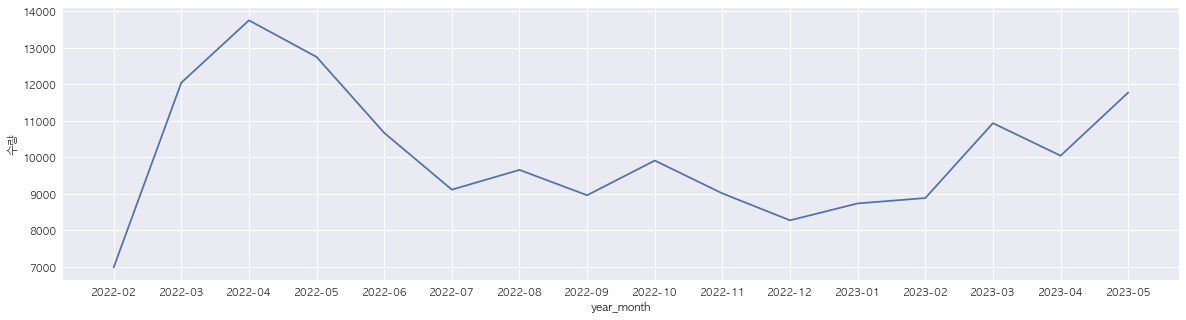

In [ ]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
plt.figure(figsize = (20,5))
sns.lineplot(data = g, x = "year_month", y = "ÏàòÎüâ")

In [ ]:
g = offline_df.groupby(["day_name"]).sum().reset_index()
plt.figure(figsize = (20,5))
sns.lineplot(data = g, x = "day_name", y = "ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ")

In [ ]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñå·Ö¶·Ñå·ÖÆ·Ñâ·Öµ_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê"})
jeju_population_2 = jeju_population_2.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê"})

In [ ]:
# tmp = offline_df.loc[offline_df["ÏÉÅÌíàÎ™Ö"].str.contains("ÎîîÏπ¥ÌîÑ"), "ÏÉÅÌíàÎ™Ö"].copy()
# tmp.value_counts()

tmp = offline_df.loc[offline_df["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].copy()
tmp.value_counts()




ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏ _ ÌÅ¥ÎûòÏãù        3559
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏ _ Ï•¨Ïãú         1377
Ïπ¥ÌéòÎùºÎñº _ ÌÅ¥ÎûòÏãù         1287
(H) ÌîåÎû´ÌôîÏù¥Ìä∏ _ ÌÅ¥ÎûòÏãù     927
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_Ïã±Í∏Ä            562
Ïπ¥ÌéòÎùºÎñº _ Ï•¨Ïãú           507
ÌÅ¥ÎûòÏãù_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏           503
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏ _ ÎîîÏπ¥ÌîÑ         439
Ïπ¥Ìë∏ÏπòÎÖ∏ _ ÌÅ¥ÎûòÏãù          432
(H) ÌîåÎû´ÌôîÏù¥Ìä∏ _ Ï•¨Ïãú      402
ÌÅ¥ÎûòÏãù_Ïπ¥ÌéòÎùºÎñº            325
Ïπ¥ÌéòÎùºÎñº _ ÎîîÏπ¥ÌîÑ          294
Ïò§ÌãÄÎ¶¨                 293
Ïπ¥ÌéòÎùºÎñº _ ÌÅ¥ÎûòÏãù          293
Î∞îÎãêÎùº ÎùºÎñº _ ÌÅ¥ÎûòÏãù        213
Ïó∞ÌïòÍ≤å                 211
Ï•¨Ïãú_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏            202
(H) ÌîåÎû´ÌôîÏù¥Ìä∏ _ ÎîîÏπ¥ÌîÑ     184
ÌÅ¥ÎûòÏãù_ÌîåÎû´ÌôîÏù¥Ìä∏           156
Ïπ¥ÌéòÎùºÎñº_Ïã±Í∏Ä             151
Ïã±Í∏Ä_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏            136
(H)ÌîåÎû´ÌôîÏù¥Ìä∏_Ïã±Í∏Ä         107
ÌÅ¥ÎûòÏãù_Ïπ¥Ìë∏ÏπòÎÖ∏            107
Ïπ¥Ìë∏ÏπòÎÖ∏ _ Ï•¨Ïãú           102
Ïπ¥Ìë∏ÏπòÎÖ∏ _ ÎîîÏπ¥ÌîÑ           87
Ï•¨Ïãú_Ïπ¥ÌéòÎùºÎñº              84
üü¢ ÏïºÏô∏           

In [ ]:
# tmp.apply(lambda x : re.sub(r"[^\0-9a-zA-ZÍ∞Ä-Ìû£\_]?","", x)).value_counts()

# new_str = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)


# tmp.apply(lambda x : re.sub(r"\s\_\s|\s\s|\s|\+","_", x)).value_counts()
tmp = offline_df.copy()
pattern = r'\s*_\s*'
tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"] = tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].apply(lambda x : re.sub(pattern, r'_', x))
tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"] = tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].apply(lambda x : re.sub("\s", "", x))
tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].value_counts()

rename_dict = {"ÌÅ¥ÎûòÏãù_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏" : "ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_ÌÅ¥ÎûòÏãù",
               "ÌÅ¥ÎûòÏãù_Ïπ¥ÌéòÎùºÎñº" : "Ïπ¥ÌéòÎùºÎñº_ÌÅ¥ÎûòÏãù",
               "ÌÅ¥ÎûòÏãù_ÌîåÎû´ÌôîÏù¥Ìä∏" : "ÌîåÎû´ÌôîÏù¥Ìä∏_ÌÅ¥ÎûòÏãù",
               "ÌÅ¥ÎûòÏãù_Ïπ¥Ìë∏ÏπòÎÖ∏" : "Ïπ¥Ìë∏ÏπòÎÖ∏_ÌÅ¥ÎûòÏãù",
               "ÌÅ¥ÎûòÏãù_Î∞îÎãêÎùºÎùºÎñº" : "Î∞îÎãêÎùºÎùºÎñº_ÌÅ¥ÎûòÏãù",

               "Ï•¨Ïãú_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏" : "ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_Ï•¨Ïãú",
               "Ï•¨Ïãú_Ïπ¥ÌéòÎùºÎñº" : "Ïπ¥ÌéòÎùºÎñº_Ï•¨Ïãú",
               "Ï•¨Ïãú_ÌîåÎû´ÌôîÏù¥Ìä∏" : "ÌîåÎû´ÌôîÏù¥Ìä∏_Ï•¨Ïãú",
               "Ï•¨Ïãú_Ïπ¥Ìë∏ÏπòÎÖ∏" : "Ïπ¥Ìë∏ÏπòÎÖ∏_Ï•¨Ïãú",
               "Ï•¨Ïãú_Î∞îÎãêÎùºÎùºÎñº" : "Î∞îÎãêÎùºÎùºÎñº_Ï•¨Ïãú",

               "Ïã±Í∏Ä_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏" : "ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_Ïã±Í∏Ä",
               "Ïã±Í∏Ä_Ïπ¥ÌéòÎùºÎñº" : "Ïπ¥ÌéòÎùºÎñº_Ïã±Í∏Ä",
               "Ïã±Í∏Ä_ÌîåÎû´ÌôîÏù¥Ìä∏" : "ÌîåÎû´ÌôîÏù¥Ìä∏_Ïã±Í∏Ä",
               "Ïã±Í∏Ä_Ïπ¥Ìë∏ÏπòÎÖ∏" : "Ïπ¥Ìë∏ÏπòÎÖ∏_Ïã±Í∏Ä",
               "Ïã±Í∏Ä_Î∞îÎãêÎùºÎùºÎñº" : "Î∞îÎãêÎùºÎùºÎñº_Ïã±Í∏Ä",

               "ÎîîÏπ¥ÌîÑ_ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏" : "ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_ÎîîÏπ¥ÌîÑ",
               "ÎîîÏπ¥ÌîÑ_Ïπ¥ÌéòÎùºÎñº" : "Ïπ¥ÌéòÎùºÎñº_Ïã±ÎîîÏπ¥ÌîÑ",
               "ÎîîÏπ¥ÌîÑ_ÌîåÎû´ÌôîÏù¥Ìä∏" : "ÌîåÎû´ÌôîÏù¥Ìä∏_ÎîîÏπ¥ÌîÑ",
               "ÎîîÏπ¥ÌîÑ_Ïπ¥Ìë∏ÏπòÎÖ∏" : "Ïπ¥Ìë∏ÏπòÎÖ∏_ÎîîÏπ¥ÌîÑ",
               "ÎîîÏπ¥ÌîÑ_Î∞îÎãêÎùºÎùºÎñº" : "Î∞îÎãêÎùºÎùºÎñº_ÎîîÏπ¥ÌîÑ",
              }

beans_lst = ["ÌÅ¥ÎûòÏãù_", "Ï•¨Ïãú_", "Ïã±Í∏Ä_", "ÎîîÏπ¥ÌîÑ_"]
for bean in beans_lst:
    idx = tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"][tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].str.contains(bean)].index
    tmp.loc[idx,"ÏÉÅÌíàÎ™Ö"] = tmp.loc[idx,"ÏÉÅÌíàÎ™Ö"].map(rename_dict)

tmp.loc[tmp["Ïπ¥ÌÖåÍ≥†Î¶¨"] == "Basic", "ÏÉÅÌíàÎ™Ö"].value_counts()



ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_ÌÅ¥ÎûòÏãù       4062
Ïπ¥ÌéòÎùºÎñº_ÌÅ¥ÎûòÏãù        1905
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_Ï•¨Ïãú        1579
(H)ÌîåÎû´ÌôîÏù¥Ìä∏_ÌÅ¥ÎûòÏãù     927
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_Ïã±Í∏Ä         698
Ïπ¥ÌéòÎùºÎñº_Ï•¨Ïãú          591
Ïπ¥Ìë∏ÏπòÎÖ∏_ÌÅ¥ÎûòÏãù         539
ÏïÑÎ©îÎ¶¨Ïπ¥ÎÖ∏_ÎîîÏπ¥ÌîÑ        502
(H)ÌîåÎû´ÌôîÏù¥Ìä∏_Ï•¨Ïãú      402
Ïπ¥ÌéòÎùºÎñº_ÎîîÏπ¥ÌîÑ         294
Ïò§ÌãÄÎ¶¨              293
Î∞îÎãêÎùºÎùºÎñº_ÌÅ¥ÎûòÏãù        259
Ïó∞ÌïòÍ≤å              211
Ïπ¥ÌéòÎùºÎñº_Ïã±Í∏Ä          198
(H)ÌîåÎû´ÌôîÏù¥Ìä∏_ÎîîÏπ¥ÌîÑ     184
ÌîåÎû´ÌôîÏù¥Ìä∏_ÌÅ¥ÎûòÏãù        182
Ïπ¥Ìë∏ÏπòÎÖ∏_Ï•¨Ïãú          123
(H)ÌîåÎû´ÌôîÏù¥Ìä∏_Ïã±Í∏Ä      107
Ïπ¥Ìë∏ÏπòÎÖ∏_ÎîîÏπ¥ÌîÑ         103
ÌîåÎû´ÌôîÏù¥Ìä∏_Ï•¨Ïãú          79
üü¢ÏïºÏô∏               76
ÏãúÎüΩ                64
Ïπ¥Ìë∏ÏπòÎÖ∏_Ïã±Í∏Ä           61
ÌîåÎû´ÌôîÏù¥Ìä∏_Ïã±Í∏Ä          57
Ïπ¥ÌéòÎùºÎñº_Ïã±ÎîîÏπ¥ÌîÑ         48
Î∞îÎãêÎùºÏãúÎüΩ             46
Î∞îÎãêÎùºÎùºÎñº_ÎîîÏπ¥ÌîÑ         40
1ÏÉ∑Ï∂îÍ∞Ä              35
üü§Ìè¨Ïû•               34
Î∞îÎãêÎùºÎùºÎñº_Ï•¨Ïãú       

## feature Î≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [ ]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñå·Ö¶·Ñå·ÖÆ·Ñâ·Öµ_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê"})
jeju_population_2 = jeju_population_2.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê"})
g = pd.concat([g,jeju_population_1["Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê"][1:].reset_index(drop = True)], axis = 1)
g = pd.concat([g,jeju_population_2["Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê"][1:].reset_index(drop = True)], axis = 1)
g = g.drop(["year","month","day","hour"], axis = 1)
g

year_month           Ìï©Í≥Ñ  ÏÉÅÌíàÎ≥Ñ Ìï†Ïù∏      Í≤∞Ï†ú Ìï†Ïù∏        Ïπ¥Îìú Í≤∞Ï†ú      ÌòÑÍ∏à Í≤∞Ï†ú  \
0     2022-02  136292200.0     0.0   256000.0  133937400.0  2098800.0   
1     2022-03  238486600.0     0.0   931200.0  232371300.0  5184100.0   
2     2022-04  254269600.0     0.0   497450.0  248894750.0  4877400.0   
3     2022-05  247494100.0     0.0   300600.0  239744200.0  7449300.0   
4     2022-06  211602100.0     0.0  1087900.0  207065200.0  3449000.0   
5     2022-07  186433502.0     0.0   879800.0  180643100.0  4910602.0   
6     2022-08  192269100.0     0.0   873580.0  187841220.0  3554300.0   
7     2022-09  184572800.0     0.0   476200.0  180184690.0  3911910.0   
8     2022-10  197741700.0     0.0   633400.0  192359500.0  4748800.0   
9     2022-11  174579400.0     0.0   241400.0  169115300.0  5222700.0   
10    2022-12  160632500.0     0.0   621400.0  157405300.0  2605800.0   
11    2023-01  180509500.0     0.0   943000.0  174365200.0  5157300.0   
12    2023-02  182083000.0     0.0   389000.0  177918100.0  3137500.0   
13    2023-03  218878900.0     0.0   699000.0  212453800.0  4567100.0   
14    2023-04  199064200.0     0.0   698600.0  194855400.0  2595700.0   
15    2023-05  242641800.0  7200.0   361540.0  236270860.0  3917500.0   

        Í∞ÑÌé∏ Í≤∞Ï†ú     Í∏∞ÌÉÄ Í≤∞Ï†ú         ÌôòÎ∂à     ÏàòÎüâ    ÏÉÅÌíàÎ≥Ñ Îã®Í∞Ä       ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ   Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê  \
0         0.0       0.0  2100000.0   6987  44011500   48341300.0  5076037.0   
1         0.0       0.0  3669800.0  12046  86498500   93120200.0  4829488.0   
2         0.0       0.0  4737400.0  13753  91784700  100824800.0  5404632.0   
3         0.0       0.0  3561400.0  12751  89007200   97623600.0  5386174.0   
4         0.0       0.0  3976300.0  10672  73752600   81317700.0  5873436.0   
5         0.0       0.0  3255600.0   9117  64060201   70041802.0  8057212.0   
6         0.0       0.0  3047900.0   9658  64855400   71376200.0  6523929.0   
7         0.0       0.0  6072600.0   8964  61209500   66923300.0  5053172.0   
8         0.0       0.0  2663400.0   9914  66830600   73047700.0  6104759.0   
9         0.0       0.0  2497400.0   9014  61067600   66627200.0  5260455.0   
10        0.0       0.0  2294900.0   8277  58097100   63064000.0  4804578.0   
11        0.0   44000.0  1752800.0   8740  62049100   67270000.0  5377937.0   
12        0.0  638400.0  2209400.0   8887  60518500   66635300.0  4936273.0   
13   672500.0  486500.0  6258500.0  10938  74599800   81336200.0  5275678.0   
14   574700.0  339800.0  2691100.0  10047  69547000   77255500.0  5121691.0   
15  1711500.0  373200.0  4522300.0  11777  73428800   81331700.0  5203799.0   

    Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê  
0   4831029.0  
1   4692568.0  
2   5215911.0  
3   5211568.0  
4   5497719.0  
5   7291538.0  
6   6155493.0  
7   4988408.0  
8   6001209.0  
9   5196776.0  
10  4749068.0  
11  5203011.0  
12  4868528.0  
13  5345546.0  
14  5147352.0  
15  5287218.0

<AxesSubplot:xlabel='year_month', ylabel='Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê'>

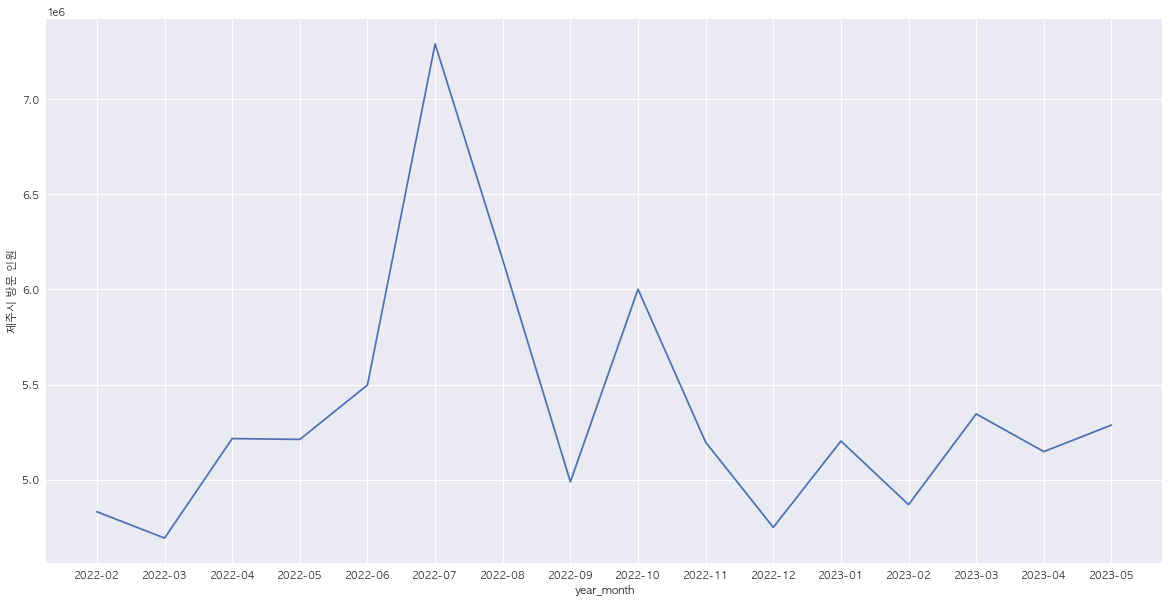

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data= g, x = "year_month", y = "Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê")
# sns.lineplot(data= g, x = "year_month", y = "Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê")
# sns.lineplot(data= g, x = "year_month", y = "ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ")

<AxesSubplot:xlabel='year_month', ylabel='ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ'>

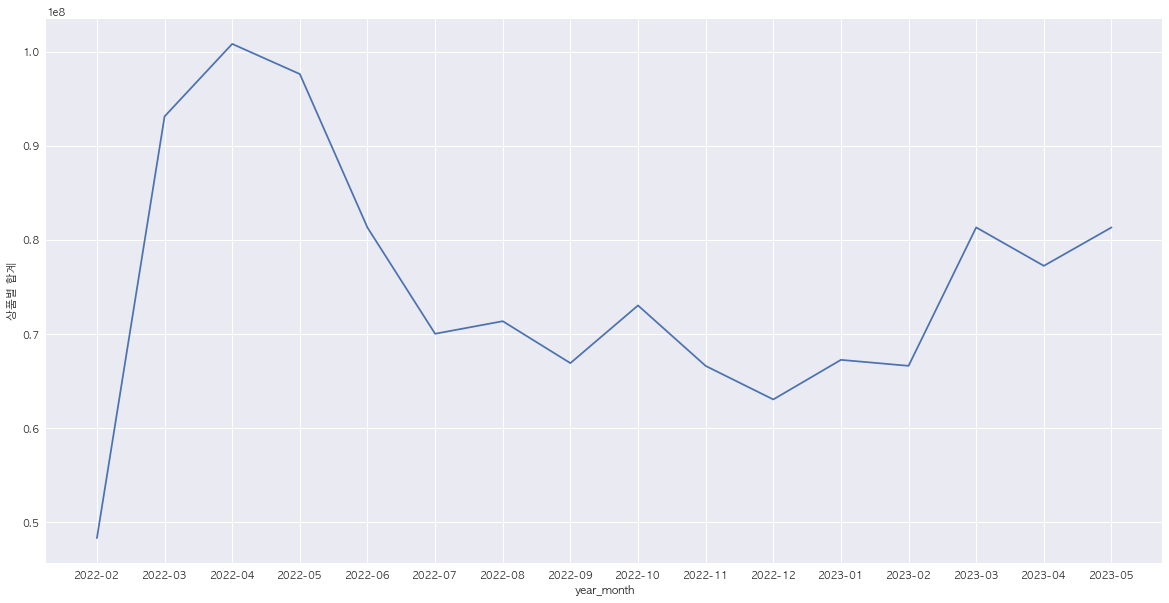

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data= g, x = "year_month", y = "ÏÉÅÌíàÎ≥Ñ Ìï©Í≥Ñ")

<AxesSubplot:>

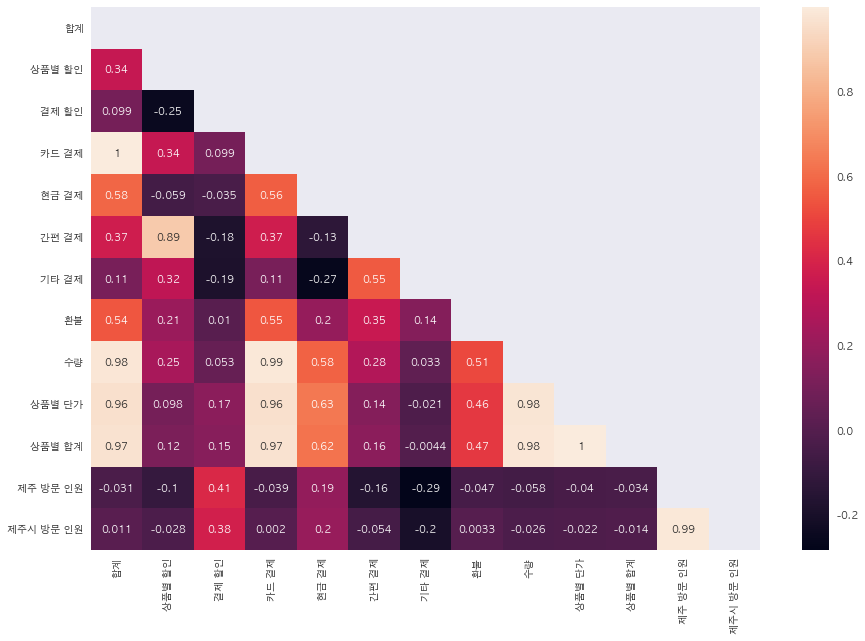

In [ ]:
correlation = g.corr()
mask = np.triu(np.ones(correlation.shape))
plt.figure(figsize = (15,10))
sns.heatmap(correlation, mask = mask, annot= True)

<AxesSubplot:>

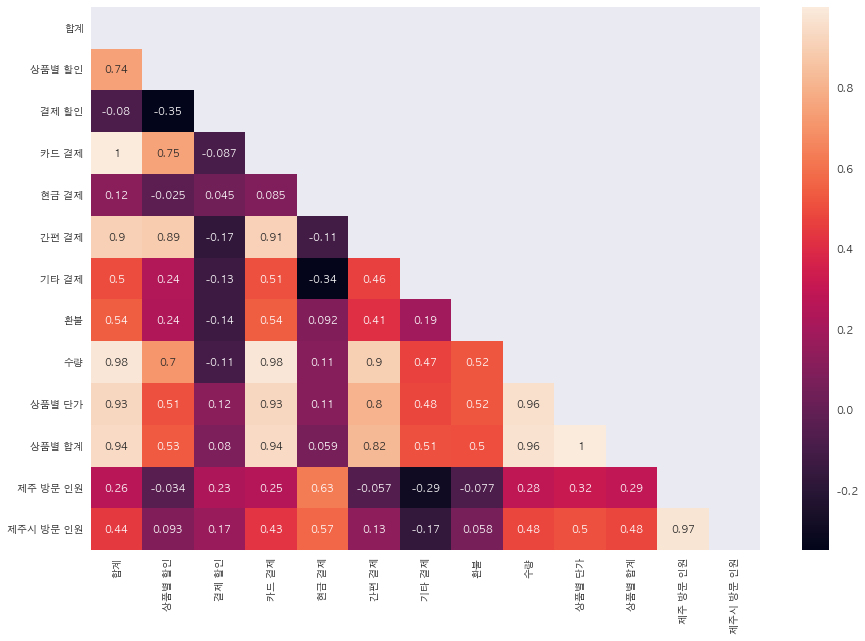

In [ ]:
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()

g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/·Ñå·Ö¶·Ñå·ÖÆ·Ñê·Ö≥·Ü®·Ñá·Öß·ÜØ·Ñå·Ö°·Ñé·Öµ·ÑÉ·Ö©_·Ñå·Ö¶·Ñå·ÖÆ·Ñâ·Öµ_·Ñá·Ö°·Üº·ÑÜ·ÖÆ·Ü´·Ñå·Ö°·Ñâ·ÖÆ.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê"})
jeju_population_2 = jeju_population_2.rename(columns={"Î∞©Î¨∏Ïûê Ïàò":"Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê"})
g = pd.concat([g,jeju_population_1["Ï†úÏ£º Î∞©Î¨∏ Ïù∏Ïõê"][1:].reset_index(drop = True)], axis = 1)
g = pd.concat([g,jeju_population_2["Ï†úÏ£ºÏãú Î∞©Î¨∏ Ïù∏Ïõê"][1:].reset_index(drop = True)], axis = 1)
g = g.drop(["year","month","day","hour"], axis = 1)

g.iloc[7:, 1:] = sd_scaler.fit_transform(g.iloc[7:, 1:])

correlation = g.iloc[7:, 1:].corr()
mask = np.triu(np.ones(correlation.shape))
plt.figure(figsize = (15,10))
sns.heatmap(correlation, mask = mask, annot= True)

